# **Name of the Experiment:**  Implementing encoding and decoding scheme using NRZ-L, NRZ-I and Manchester

## NRZ-I Encoding and Decoding

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bit_sequence = '10111001'

In [3]:
bits_list = [int(char) for char in bit_sequence]
print(bits_list)

[1, 0, 1, 1, 1, 0, 0, 1]


In [4]:
def plot_diagram(encoded_signal):
    time = range(len(encoded_signal))
    plt.step(time, encoded_signal, where='post', label="NRZ-I Signal")
    plt.xlabel('Time')
    plt.ylabel('Signal Level')
    plt.title('NRZ-I Input')
    plt.grid(True)
    plt.show()

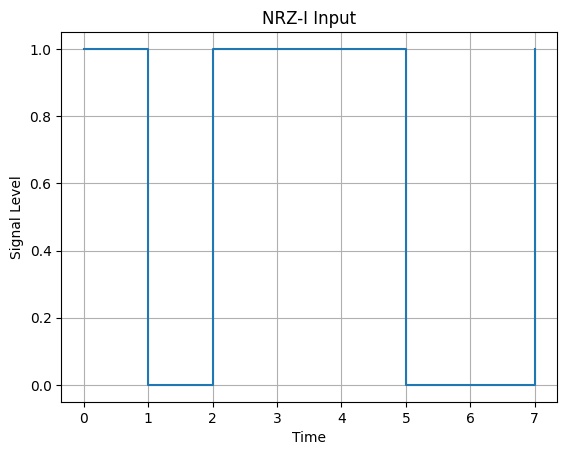

In [10]:
plot_diagram(bits_list)

### Encoding

In [6]:
def nrzi_encode(bits):
    encoded_signal=''
    initial_state = '1'
    previous_state = initial_state
    for bit in bits:
        if bit == '1':
            if previous_state == '0':
                previous_state = '1'
            else:
                previous_state = '0'
        # No change for 0, so just append the current level
        encoded_signal+=previous_state
    return encoded_signal

In [7]:
binary_input = "1011001"
encoded = nrzi_encode(binary_input)
print("Encoded NRZ-I:", encoded)

Encoded NRZ-I: 0010001


In [11]:
bianry_input_list = [int(char) for char in binary_input]
print(bianry_input_list)

[1, 0, 1, 1, 0, 0, 1]


In [8]:
encoded_list = [int(char) for char in encoded]
print(encoded_list)

[0, 0, 1, 0, 0, 0, 1]


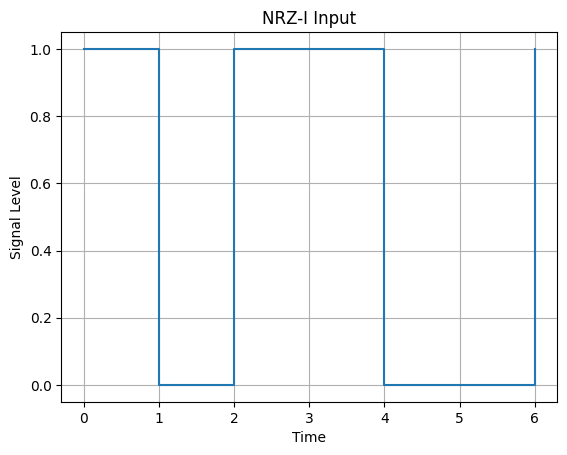

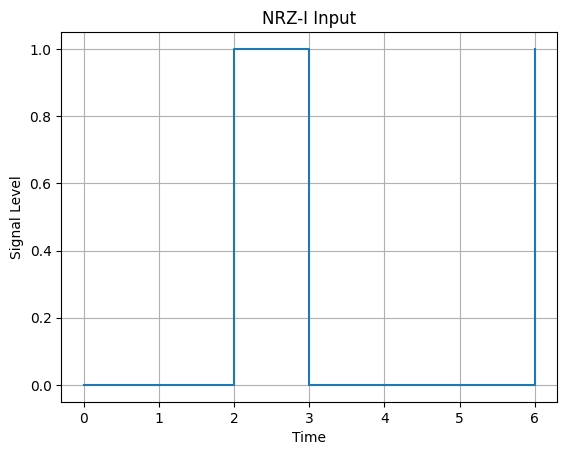

In [16]:
plot_diagram(bianry_input_list)
plot_diagram(encoded_list)

### Decoding

In [13]:
def nrzi_decode(encoded_signal):
    decoded_data = '1'  # The first bit is assumed to be 1 (since initial level is arbitrary)

    for i in range(1, len(encoded_signal)):
        if encoded_signal[i] == encoded_signal[i - 1]:
            decoded_data += '0'  # No transition means 0
        else:
            decoded_data += '1'  # Transition means 1

    return decoded_data

In [14]:
decoded = nrzi_decode(encoded)
print(decoded)

1011001


In [15]:
decoded_list = [int(char) for char in decoded]
print(decoded_list)

[1, 0, 1, 1, 0, 0, 1]


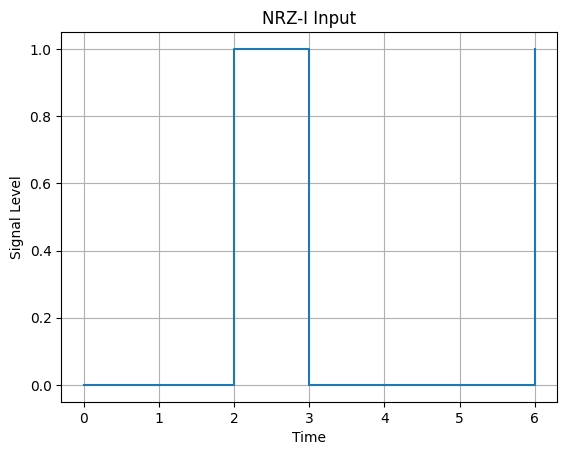

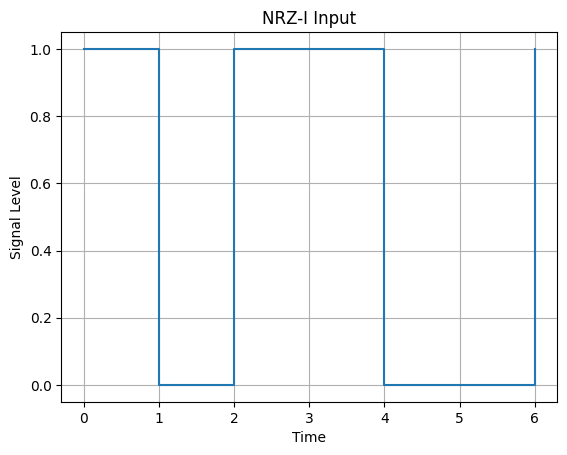

In [17]:
plot_diagram(encoded_list)
plot_diagram(decoded_list)

## NRZ-L Encoding and Decoding

### Encoding

In [18]:
def nrz_l_encode(bits):
    encoded_signal =[]
    for bit in bits:
        if bit == '1':
            encoded_signal.append(1)
        else:
            encoded_signal.append(0)
    return encoded_signal

In [19]:
bin_input = '10111001'

In [20]:
input_list = [int(char) for char in bin_input]
print(input_list)

[1, 0, 1, 1, 1, 0, 0, 1]


In [21]:
encoded_nrzl = nrz_l_encode(bin_input)
print(encoded_nrzl)

[1, 0, 1, 1, 1, 0, 0, 1]


In [27]:
def plot_nrzl_encoding(encoded_data):
    # Time vector for plotting
    time = np.linspace(0, len(encoded_data), len(encoded_data) * 100)
    signal = np.repeat(encoded_data, 100)

    # Plot the signal
    plt.step(time, signal, where='post', label="NRZ-L")
    plt.title("NRZ-L Encoding")
    plt.xlabel("Time")
    plt.ylabel("Voltage")
    plt.grid(True)
    plt.show()

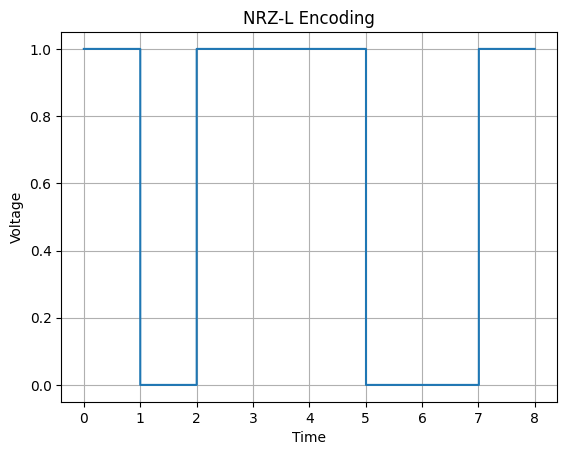

In [28]:
plot_nrzl_encoding(encoded_nrzl)

### Decoding

In [29]:
def nrz_l_decode(encoded_data):
    # NRZ-L decoding: +1 -> 1, 0 -> 0
    decoded_data = ''
    for value in encoded_data:
        if value == 1:
            decoded_data += '1'
        else:
            decoded_data += '0'
    return decoded_data

In [31]:
decoded_nrzl = nrz_l_decode(encoded_nrzl)
print(decoded_nrzl)

10111001


In [32]:
decoded_nrzl_list = [int(char) for char in decoded_nrzl]
print(decoded_nrzl_list)

[1, 0, 1, 1, 1, 0, 0, 1]


In [33]:
def plot_nrzl_decoding(encoded_data):
    # Time vector for plotting
    time = np.linspace(0, len(encoded_data), len(encoded_data) * 100)
    signal = np.repeat(encoded_data, 100)

    # Plot the signal
    plt.step(time, signal, where='post', label="NRZ-L")
    plt.title("NRZ-L Decoding")
    plt.xlabel("Time")
    plt.ylabel("Voltage")
    plt.grid(True)
    plt.show()

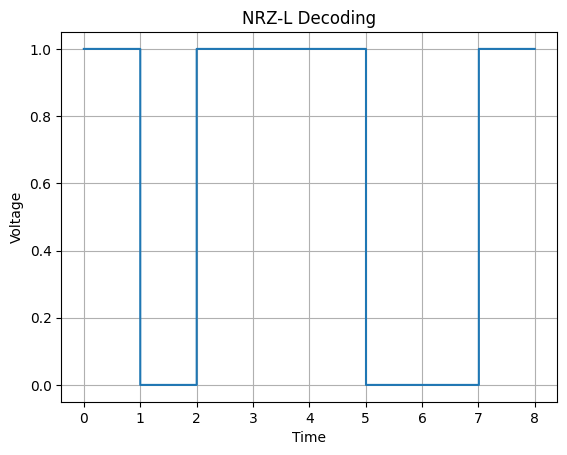

In [34]:
plot_nrzl_decoding(decoded_nrzl_list)

## Manchester Encoding and Decoding

In [35]:
def manchester_encode(bits):
    encoded = []
    for bit in bits:
        if bit == '1':
            # 1 is represented by Low to High transition (0 → 1)
            encoded.append('01')  # '0' → '1'
        else:
            # 0 is represented by High to Low transition (1 → 0)
            encoded.append('10')  # '1' → '0'
    return ''.join(encoded)

In [36]:
binary_input = '1011001'
encoded_manchester = manchester_encode(binary_input)
print(f"Encoded Signal: {encoded_manchester}")

Encoded Signal: 01100101101001


In [38]:
encoded_manchester_list = [int(char) for char in encoded_manchester]
print(encoded_manchester_list)

[0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1]


In [46]:
def plot_manchester_encode(signal, title="Manchester Encoded Signal"):
    time = np.arange(len(signal))/2
    plt.figure(figsize=(8, 3))
    plt.step(time, signal, where='post')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.yticks([0, 1])
    plt.grid(True)
    plt.show()

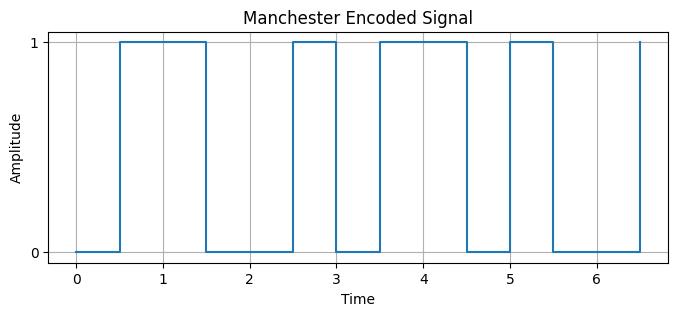

In [47]:
plot_manchester_encode(encoded_manchester_list)

### Decoding

In [48]:
def manchester_decode(encoded_signal):
    decoded_data =''
    for i in range(0,len(encoded_signal),2):
        if encoded_signal[i] == '0' and encoded_signal[i+1] == '1':
            decoded_data += '1'
        elif encoded_signal[i] == '1' and encoded_signal[i+1] == '0':
            decoded_data += '0'
    return decoded_data

In [51]:
decoded_manchester = manchester_decode(encoded_manchester)
print(f"Decoded Signal: {decoded_manchester}")

Decoded Signal: 1011001


[1, 0, 1, 1, 0, 0, 1]


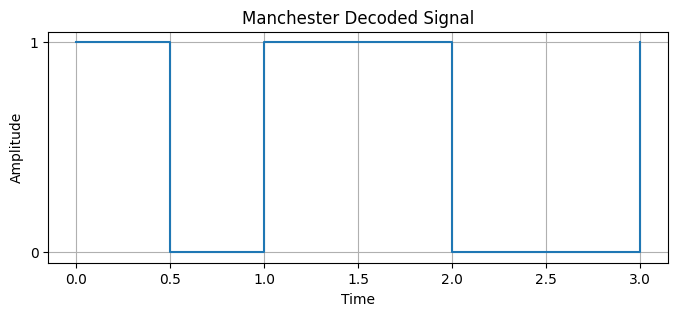

In [53]:
decoded_manchester_list = [int(char) for char in decoded_manchester]
print(decoded_manchester_list)
plot_manchester_encode(decoded_manchester_list, "Manchester Decoded Signal")